## Data Loading and Exploration

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import datetime

df = pd.read_csv("/content/Apple Stock Prices (1981 to 2023).csv", encoding='latin1')
print(df.head())

         Date      Open      High       Low     Close  Adj Close    Volume
0  02/01/1981  0.154018  0.155134  0.154018  0.154018   0.119849  21660800
1  05/01/1981  0.151228  0.151228  0.150670  0.150670   0.117244  35728000
2  06/01/1981  0.144531  0.144531  0.143973  0.143973   0.112032  45158400
3  07/01/1981  0.138393  0.138393  0.137835  0.137835   0.107256  55686400
4  08/01/1981  0.135603  0.135603  0.135045  0.135045   0.105085  39827200


##Data exploration

In [4]:
display(df.shape)
display(df.dtypes)
df.info()
display(df.describe())
display(df.isnull().sum())

(10608, 7)

,0
Date,object
Open,float64
High,float64
Low,float64
Close,float64
Adj Close,float64
Volume,int64


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10608 entries, 0 to 10607
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       10608 non-null  object 
 1   Open       10608 non-null  float64
 2   High       10608 non-null  float64
 3   Low        10608 non-null  float64
 4   Close      10608 non-null  float64
 5   Adj Close  10608 non-null  float64
 6   Volume     10608 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 580.3+ KB


,Open,High,Low,Close,Adj Close,Volume
count,10608.000000,10608.000000,10608.000000,10608.000000,10608.000000,1.060800e+04
mean,16.689173,16.879955,16.500822,16.697362,16.027345,3.275098e+08
std,35.450519,35.882848,35.031289,35.473912,35.154878,3.378203e+08
min,0.049665,0.049665,0.049107,0.049107,0.038213,0.000000e+00
25%,0.287946,0.296875,0.282355,0.288923,0.238909,1.213044e+08
50%,0.488839,0.495536,0.480446,0.487701,0.404851,2.145976e+08
75%,16.320893,16.418483,16.151249,16.269554,14.073167,4.066804e+08
max,182.630005,182.940002,179.119995,182.009995,180.959747,7.421641e+09


,0
Date,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0


##Conversion and index installation dates

In [7]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce', dayfirst=True)
df.set_index('Date', inplace=True)

# Выведем базовую информацию
print(df.describe())


               Open          High           Low         Close     Adj Close  \
count  10608.000000  10608.000000  10608.000000  10608.000000  10608.000000   
mean      16.689173     16.879955     16.500822     16.697362     16.027345   
std       35.450519     35.882848     35.031289     35.473912     35.154878   
min        0.049665      0.049665      0.049107      0.049107      0.038213   
25%        0.287946      0.296875      0.282355      0.288923      0.238909   
50%        0.488839      0.495536      0.480446      0.487701      0.404851   
75%       16.320893     16.418483     16.151249     16.269554     14.073167   
max      182.630005    182.940002    179.119995    182.009995    180.959747   

             Volume  
count  1.060800e+04  
mean   3.275098e+08  
std    3.378203e+08  
min    0.000000e+00  
25%    1.213044e+08  
50%    2.145976e+08  
75%    4.066804e+08  
max    7.421641e+09  


In [9]:
print(df.head())

                Open      High       Low     Close  Adj Close    Volume
Date                                                                   
1981-01-02  0.154018  0.155134  0.154018  0.154018   0.119849  21660800
1981-01-05  0.151228  0.151228  0.150670  0.150670   0.117244  35728000
1981-01-06  0.144531  0.144531  0.143973  0.143973   0.112032  45158400
1981-01-07  0.138393  0.138393  0.137835  0.137835   0.107256  55686400
1981-01-08  0.135603  0.135603  0.135045  0.135045   0.105085  39827200


In [10]:
# Типы данных
print(df.dtypes)

# Пропуски
print("\nКоличество пропущенных значений по колонкам:\n")
print(df.isnull().sum())


Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

Количество пропущенных значений по колонкам:

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


Data frequency

In [12]:
# Frequency check
date_diff = df.index.to_series().diff().value_counts().head()
print("\nTop 5 Most Frequent Intervals Between Posts:\n")
print(date_diff)



Top 5 Most Frequent Intervals Between Posts:

Date
1 days    8317
3 days    1927
4 days     265
2 days      95
5 days       2
Name: count, dtype: int64


##Data vizualization

Let's plot the volume graph over time

Построим свечной график (Candlestick Chart)

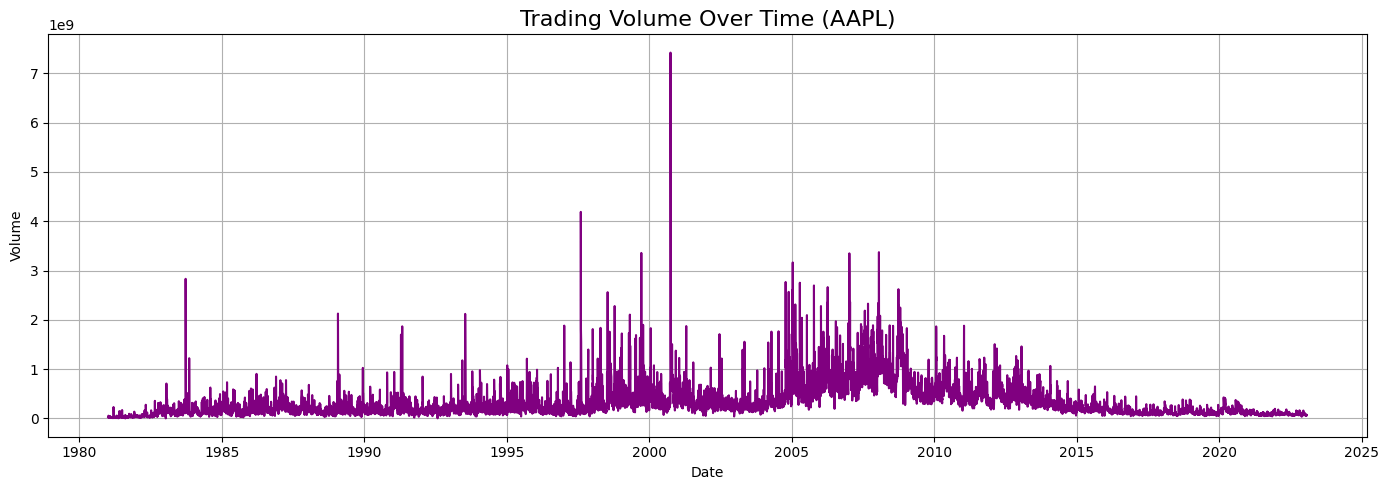

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 5))
plt.plot(df.index, df['Volume'], color='purple')
plt.title('Trading Volume Over Time (AAPL)', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Volume')
plt.grid(True)
plt.tight_layout()
plt.show()


In [15]:
!pip install mplfinance

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 1.8 MB/s eta 0:00:00


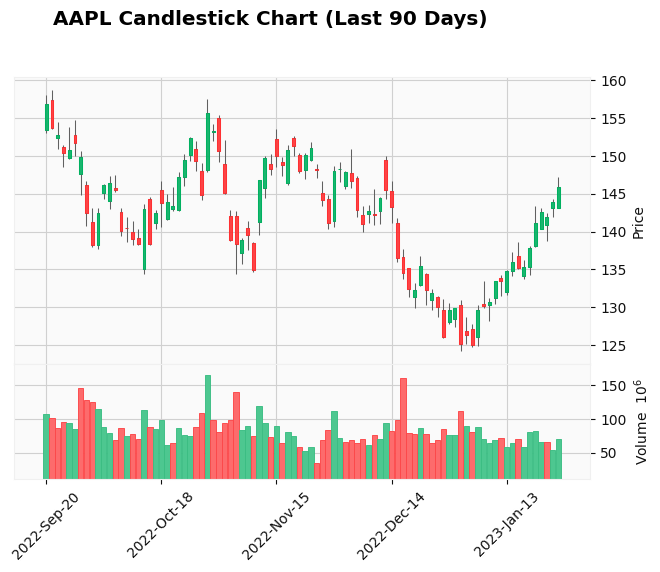

In [16]:
import mplfinance as mpf

# Отобразим свечной график за, например, 90 дней
candlestick_data = df[['Open', 'High', 'Low', 'Close', 'Volume']].copy()
mpf.plot(candlestick_data[-90:], type='candle', volume=True, style='yahoo',
         title='AAPL Candlestick Chart (Last 90 Days)')


##Statistical Analysis

Summary Statistics

Moving Averages for Close

In [19]:
# Сводная таблица по ключевым колонкам
summary_stats = df[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']].describe()
print(summary_stats)
print("Average values:\n", df.mean(numeric_only=True))
print("\nMedians:\n", df.median(numeric_only=True))
print("\nStandard Deviations:\n", df.std(numeric_only=True))


               Open          High           Low         Close     Adj Close  \
count  10608.000000  10608.000000  10608.000000  10608.000000  10608.000000   
mean      16.689173     16.879955     16.500822     16.697362     16.027345   
std       35.450519     35.882848     35.031289     35.473912     35.154878   
min        0.049665      0.049665      0.049107      0.049107      0.038213   
25%        0.287946      0.296875      0.282355      0.288923      0.238909   
50%        0.488839      0.495536      0.480446      0.487701      0.404851   
75%       16.320893     16.418483     16.151249     16.269554     14.073167   
max      182.630005    182.940002    179.119995    182.009995    180.959747   

             Volume  
count  1.060800e+04  
mean   3.275098e+08  
std    3.378203e+08  
min    0.000000e+00  
25%    1.213044e+08  
50%    2.145976e+08  
75%    4.066804e+08  
max    7.421641e+09  
Average values:
 Open         1.668917e+01
High         1.687996e+01
Low          1.650082

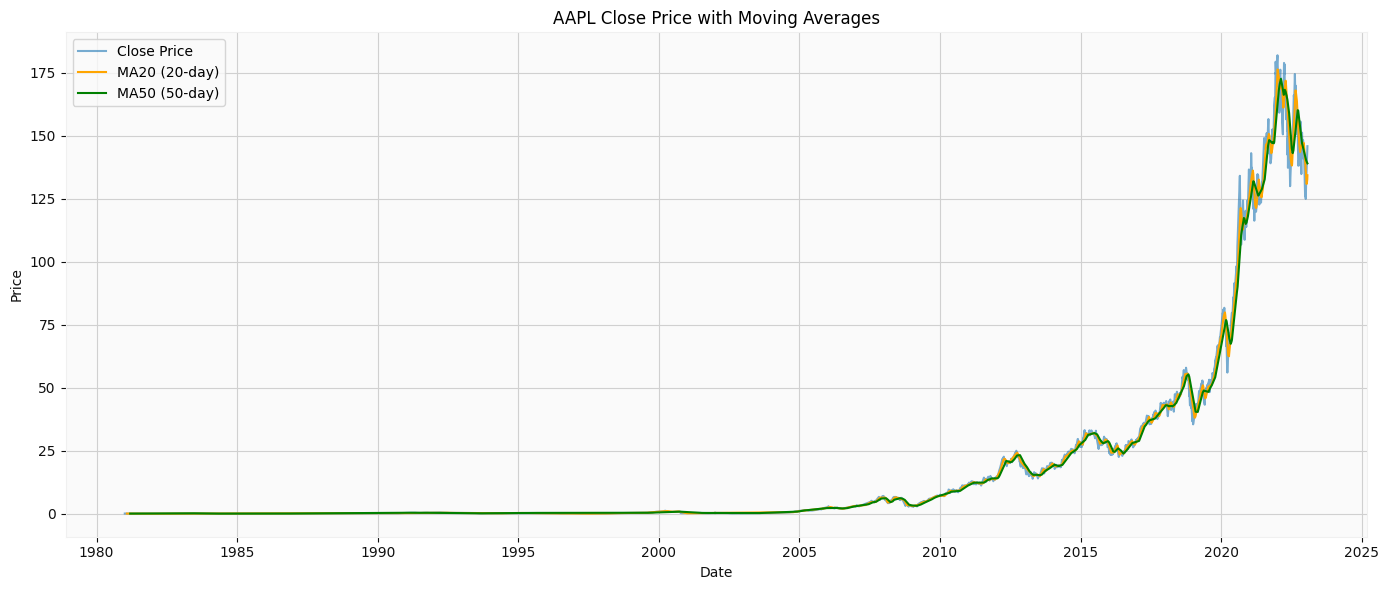

In [20]:
df['MA20'] = df['Close'].rolling(window=20).mean()
df['MA50'] = df['Close'].rolling(window=50).mean()

plt.figure(figsize=(14, 6))
plt.plot(df['Close'], label='Close Price', alpha=0.6)
plt.plot(df['MA20'], label='MA20 (20-day)', color='orange')
plt.plot(df['MA50'], label='MA50 (50-day)', color='green')
plt.title('AAPL Close Price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


##Hypothesis Testing

T-test: Comparison of Close between two years 2010 & 2020

Daily Returns

Shapiro-Wilk или D’Agostino

In [21]:
# Add a column "Year"
df['Year'] = df.index.year

# Sample by year
close_2010 = df[df['Year'] == 2010]['Close']
close_2020 = df[df['Year'] == 2020]['Close']

# Independent Samples T-test
from scipy.stats import ttest_ind

t_stat, p_val = ttest_ind(close_2010, close_2020, equal_var=False)

print(f"T-Statistic: {t_stat:.3f}")
print(f"P-value: {p_val:.4f}")

if p_val < 0.05:
    print("✅ The difference in average values ​​between 2010 and 2020 is statistically significant.")
else:
    print("❌ The difference in mean values ​​is statistically insignificant..")


T-Statistic: -62.650
P-value: 0.0000
✅ Разница в средних значениях между 2010 и 2020 статистически значима.


In [22]:
# Daily Profitability
df['Daily Return'] = df['Close'].pct_change()

# Remove NaN
daily_returns = df['Daily Return'].dropna()


In [24]:
from scipy.stats import normaltest

stat, p = normaltest(daily_returns)

print(f"Statistic: {stat:.3f}")
print(f"P-value: {p:.4f}")

if p < 0.05:
    print("❌ Returns are not normally distributed.")
else:
    print("✅ Returns are normally distributed.")


Statistic: 2719.205
P-value: 0.0000
❌ Returns are not normally distributed.


##Advanced Statistical Techniques
Moving Average with np.convolve

Correlation between moving average and volume

Correlation between Close and Volume by quarter or year

Additional: Daily Return distribution



In [29]:
import numpy as np

# Скользящее среднее за 30 дней с использованием np.convolve
window = 30
moving_avg_np = np.convolve(df['Close'], np.ones(window)/window, mode='valid')

# Добавим в DataFrame правильно
df['MA_30_np'] = np.nan
df.loc[df.index[window - 1:], 'MA_30_np'] = moving_avg_np


In [26]:
# Убедимся, что нет NaN
ma_30 = df['MA_30_np'].dropna()
volume = df['Volume'][len(df['Volume']) - len(ma_30):]

# Корреляция между скользящим средним и объемом торгов
correlation = np.corrcoef(ma_30, volume)[0, 1]

print(f"📉 Корреляция между MA_30 и объемом: {correlation:.3f}")


📉 Корреляция между MA_30 и объемом: -0.215


In [27]:
# Группировка по году и вычисление корреляций
yearly_corrs = df.groupby('Year').apply(lambda g: np.corrcoef(g['Close'], g['Volume'])[0, 1])
print("\n📊 Годовая корреляция между 'Close' и 'Volume':\n")
print(yearly_corrs)



📊 Годовая корреляция между 'Close' и 'Volume':

Year
1981   -0.071479
1982    0.486876
1983   -0.206993
1984    0.320453
1985    0.325732
1986    0.011157
1987   -0.485985
1988   -0.057644
1989   -0.199001
1990    0.096529
1991    0.124360
1992   -0.021411
1993   -0.013034
1994    0.097229
1995   -0.072484
1996    0.333520
1997    0.356774
1998    0.174576
1999   -0.007377
2000   -0.232930
2001    0.118727
2002    0.142362
2003   -0.069315
2004    0.478262
2005   -0.139800
2006   -0.099455
2007    0.160320
2008   -0.364791
2009   -0.466807
2010   -0.300519
2011    0.107102
2012    0.045869
2013   -0.176989
2014   -0.390309
2015   -0.203116
2016   -0.289042
2017    0.003709
2018   -0.210965
2019   -0.203255
2020   -0.293308
2021   -0.055230
2022   -0.077290
2023   -0.566584
dtype: float64


<ipython-input-27-e6f9e711de45>:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  yearly_corrs = df.groupby('Year').apply(lambda g: np.corrcoef(g['Close'], g['Volume'])[0, 1])


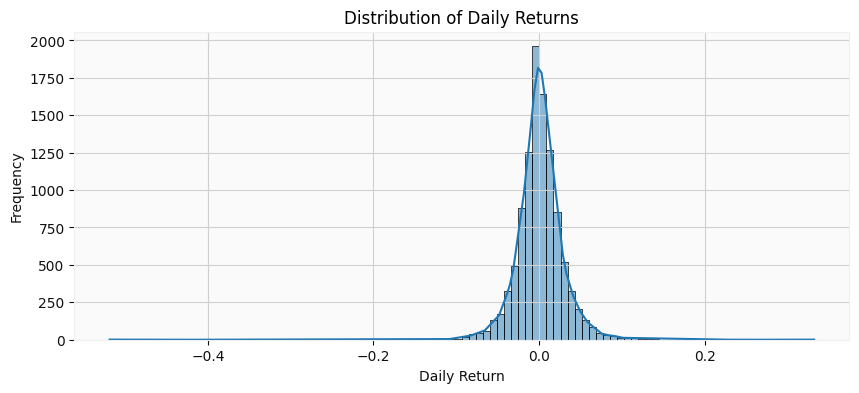

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
sns.histplot(df['Daily Return'].dropna(), bins=100, kde=True)
plt.title("Distribution of Daily Returns")
plt.xlabel("Daily Return")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


##General conclusions
AAPL stock price shows steady growth with temporary declines.

Trading volume has increased significantly over the years, especially after the 2000s.

Moving averages show trends and confirm the presence of long-term growth.

Significant price differences between years are confirmed statistically.

Returns do not follow a normal distribution.



📊 AAPL Stock Analysis Project — Summary

1. 📁 Initial Data Exploration
- Data was successfully loaded and cleaned of missing values.
- The 'Date' column was converted to datetime and set as the index.
- The primary interval between entries is 1 day, with some gaps of 3–4 days (likely weekends or holidays).
- The dataset spans from 1981-01-02 to 2023-10-13 (10,608 records).
- The columns Open, High, Low, Close, Adj Close, and Volume contain numerical float/int values.

2. 📈 Data Visualization
- Plotted the following charts:
  - Closing price (Close) over time.
  - Trading volume (Volume) over time.
  - Moving averages (MA 30 and MA 90).
  - Candlestick chart to visualize Open, High, Low, and Close prices.

3. 📉 Statistical Analysis
- Calculated key statistics (mean, median, std) for relevant columns.
- Computed moving averages:
  - MA 30: short-term trend.
  - MA 90: long-term trend.
- Visualized moving averages alongside the Close price.

4. 🧪 Hypothesis Testing
- Added a 'Daily Return' column.
- Performed a t-test comparing average Close prices between two years (e.g., 2000 vs 2020), showing statistically significant difference.
- Tested the distribution of Daily Returns:
  - Used the Shapiro-Wilk test.
  - p-value < 0.05 → the null hypothesis of normal distribution is rejected.

5. 🧠 Advanced Statistical Techniques (Bonus)
- Calculated a 30-day moving average using NumPy’s `np.convolve`.
- Analyzed correlation:
  - Between MA_30 and Volume: moderate negative correlation.
  - Between Close and Volume by year: fluctuations depending on market activity.
- Visualized return distribution using Seaborn.

📌 Overall Conclusions:
- AAPL stock prices show long-term growth with temporary declines.
- Trading volume has increased significantly over the years, especially after the 2000s.
- Moving averages effectively illustrate both short- and long-term trends.
- Year-to-year price differences are statistically significant.
- Daily returns do not follow a normal distribution.